## Repaso bibliotecas Numpy, Pandas, Matplotlib y Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

<h2><font color="blue">Ejercicio 1</font></h2>

Cree una distribución uniforme y una distribución gaussiana univariadas y grafíquelas usando histogramas.

In [17]:
unifor = np.random.default_rng().uniform(-1,0,1000)

mu, sigma = 0, 0.1 # mean and standard deviation
gauss = np.random.default_rng().normal(mu, sigma, 1000)

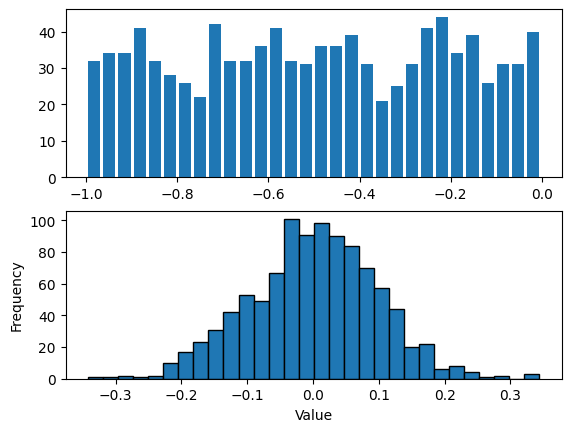

In [3]:
plt.subplot(211)
plt.hist(unifor, bins = 30, rwidth=0.8)

plt.subplot(212)
plt.hist(gauss, bins = 30, edgecolor="k")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

<h2><font color="blue">Ejercicio 2</font></h2>

Cargue los datos del archivo "datos.csv" de la carpeta `data`, analice los valores de la columna dataset para separar los datos en 4 grupos y grafíquelos usando scatterplot y subplots.

In [4]:
datos = pd.read_csv("./data/datos.csv")
datos

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [36]:
# grupo1 = datos.iloc[0:11]
# grupo2 = datos.iloc[11:22]
# grupo3 = datos.iloc[22:33]
# grupo4 = datos.iloc[33:44]

grupo1 = datos.query("dataset == 'I'")
grupo2 = datos.query("dataset == 'II'")
grupo3 = datos.query("dataset == 'III'")
grupo4 = datos.query("dataset == 'IV'")

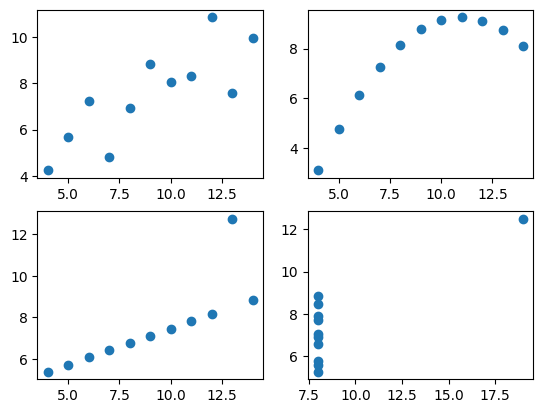

In [37]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.scatter(grupo1.x, grupo1.y)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.scatter(grupo2.x, grupo2.y)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottom left
plt.scatter(grupo3.x, grupo3.y)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.scatter(grupo4.x, grupo4.y)
plt.show()

<h2><font color="blue">Ejercicio 3</font></h2>

Escriba el código para generar dos matrices $\mathbf{M_1}$ y $\mathbf{M_2}$, de tamaño $[N\times M]$. Luego, reemplace los valores de $\mathbf{M_1}$ que sean mayores a los correspondientes de $\mathbf{M_2}$ (es decir, para cada posición de la matriz) por el valor $0$. Concatene este resultado a $\mathbf{M_2}$ para obtener una matriz $[2N\times M]$. Verifique el funcionamiento del código con algunos ejemplos, mostrando por pantalla la matriz resultante y su dimensión.
    
Ejemplo: si $\mathbf{M_1}=\begin{bmatrix}1 & 5 & 5\\ 5 & 8 & 7\end{bmatrix}$ y $\mathbf{M_2}=\begin{bmatrix}1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$, la salida deberá ser $\mathbf{R}=\begin{bmatrix}1 & 0 & 0\\ 5 & 0 & 7\\1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$  

In [38]:
m1 = np.array([[1,5,5], [5,8,7]])
m2 = np.array([[1,2,4], [5,6,7]])

condicion = m1 > m2
#print(condicion)

#for i in range(len(m1)):
#    for j in range(len(m1[0])):
#        if condicion[i][j] == True:
#            m1[i][j] = 0
#print(m1)

m1[condicion] = 0
#m1

resultado = np.concatenate((m1, m2), axis = 0)
resultado

array([[1, 0, 0],
       [5, 0, 7],
       [1, 2, 4],
       [5, 6, 7]])

<h2><font color="blue">Ejercicio 4</font></h2>

Cargue los datos contenidos en el archivo "data_corrupted.csv" a un dataframe. Como el nombre lo indica, algunos datos pueden estar corruptos. Renombre las columnas del dataframe para que tengan los nombres "col1" y "col2". Encuentre el valor medio y desvío estándar de cada columna. Corrobore los resultados usando el método `describe`.

In [8]:
corrupted = pd.read_csv("./data/data_corrupted.csv", header=None)
corrupted.mean(axis=0)
#n_nombres = ("col1", "col2")
# corrupted.columns = n_nombres

# media_col1 = round(np.mean(corrupted.col1),6)
# media_col2 = round(np.mean(corrupted.col2),6)

# corrupted.iloc[[2, 5, 6], [0]] = media_col1
# corrupted.iloc[[0, 6], [1]] = media_col2

# print(np.median(corrupted.col1), np.median(corrupted.col2))

0    0.622009
1    0.633314
dtype: float64

In [9]:
corrupted.describe()

,0,1
count,7.000000,8.000000
mean,0.622009,0.633314
std,0.335271,0.268006
min,0.197682,0.130571
25%,0.322142,0.509931
50%,0.746570,0.717479
75%,0.883935,0.827586
max,0.997657,0.903386


<h2><font color="blue">Ejercicio 5</font></h2>

Los archivos **iris-setosa.csv**, **iris-versicolor.csv** e **iris-virginica.csv** contienen la información del conjunto de datos <font face="Courier" size=3><b>iris</b></font> separados por clases (ver descripción en el archivo **iris.rst**).
    
1. Construya el conjunto de datos iris a partir de estos tres archivos.
Luego, reemplace en la columna <font face="Courier" size=3><b>class</b></font> los valores numéricos por el nombre correspondiente a la clase. Guarde el conjunto de datos en un único archivo CSV "iris.csv", incorporando estas modificaciones.


In [10]:
setosa = pd.read_csv("./data/iris-setosa.csv")
#setosa
versicolor = pd.read_csv("./data/iris-versicolor.csv")
#versicolor
virginica = pd.read_csv("./data/iris-virginica.csv")
#virginica

del setosa["class"]
setosa["class"] = "setosa"

del versicolor["class"]
versicolor["class"] = "versicolor"

del virginica["class"]
virginica["class"] = "virginica"

iris = pd.concat([setosa, versicolor, virginica])
#iris

iris.to_csv("./data/iris.csv")


2. Obtenga la media y desvio de cada atributo y compárelos con las mostradas en el archivo **iris.rst**, cree un dataframe de 2 columnas con estos datos

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
45,6.7,3.0,5.2,2.3,virginica
46,6.3,2.5,5.0,1.9,virginica
47,6.5,3.0,5.2,2.0,virginica
48,6.2,3.4,5.4,2.3,virginica


<h2><font color="blue">Ejercicio 6</font></h2>

Grafique la siguiente recta junto con el texto como se muestra en la figura y muestre por consola su pendiente.


<img src="https://drive.google.com/uc?export=view&id=1HLm6NpD4lenot5LR2BXI4SUDJbjCrZXR" width = 450>

pendiente =  0.5


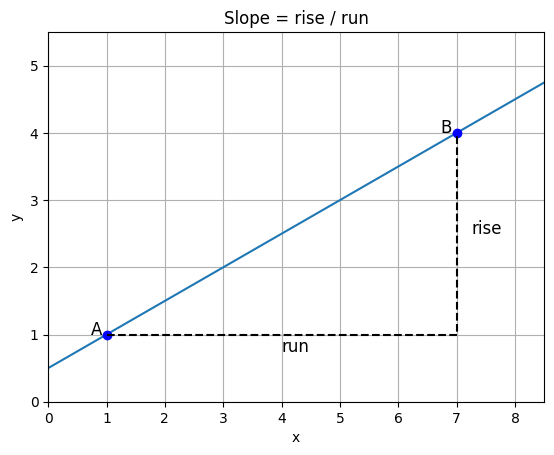

In [22]:
x = np.linspace(0, 9, 30)
m = 1/2
y = m*x+1/2
p1x = 1
p1y = 1
p2x = 7
p2y = 4

plt.plot(x, y, p1x, p1y, "bo", p2x, p2y, "bo")
plt.axis([0, 8.5, 0, 5.5])
plt.grid(True)
plt.title("Slope = rise / run")
plt.xlabel("x")
plt.ylabel("y")
plt.text(p1x - 0.08, p1y, "A", ha="right", size= 12, weight= "light")
plt.text(p2x - 0.08, p2y, "B", ha="right", size= 12, weight= "light")

plt.plot([p1x, 7, p2x], [p1y, 1, p2y], "k--")
plt.text(7 + 0.25, 2.5, "rise", ha="left", size= 12, weight= "light")
plt.text(4, 1 - 0.25, "run", ha="left", size= 12, weight= "light")

plt.show

print("pendiente = ", m)


<h2><font color="blue">Ejercicio 7</font></h2>


Cargue el conjunto de datos del archivo <b>iris.csv</b> que creó y grafique en tres histogramas la distribución de los anchos de sépalos (`sepal_width`) para cada especie de flor. Además, haga una cuarta  gráfica con los tres histogramas solapados.


<b>Figura de referencia:</b>

<div style="width:680px;margin-left: auto;margin-right: auto;">
  <img src="https://drive.google.com/uc?id=1mT_PNPqugXDyJSkNoIb1O3FxR_NzY9j7">
</div>

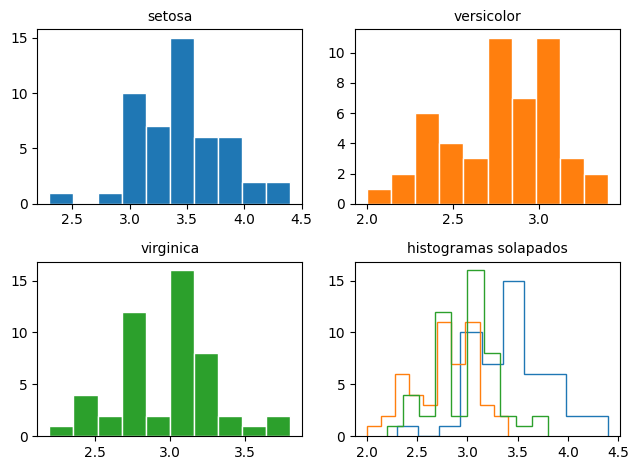

In [13]:
iris = pd.read_csv("./data/iris.csv")
setosa = iris[iris["class"] == "setosa"]
versicolor = iris[iris["class"] == "versicolor"]
virginica = iris[iris["class"] == "virginica"]


plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.hist(setosa.sepal_width, color="tab:blue", edgecolor="w")
plt.title("setosa", size=10)
#plt.axis([2, 4.5, 0, 16])


plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.hist(versicolor.sepal_width, color="tab:orange", edgecolor="w")
plt.title("versicolor", size=10)
#plt.axis([2, 3.5, 0, 12])

plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottom left
plt.hist(virginica.sepal_width, color="tab:green", edgecolor="w")
plt.title("virginica", size=10)
#plt.axis([2, 4, 0, 17])

plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.hist(setosa.sepal_width, color='tab:blue', histtype='step', label='step hist')
plt.hist(versicolor.sepal_width, color='tab:orange', histtype='step', label='step hist')
plt.hist(virginica.sepal_width, color='tab:green', histtype='step', label='step hist')
plt.title("histogramas solapados", size=10)

plt.tight_layout()
plt.show()

<h2><font color="blue">Ejercicio 8</font></h2>
    
Cargue en un `DataFrame` el conjunto de datos sobre películas dado en **imdb_1000.csv**. A partir de procesar estos datos responda a los siguientes enunciados.



In [14]:
pelis = pd.read_csv("./data/imdb_1000.csv")
pelis

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."



    
**1.** Calcule la duración media de las películas


In [15]:
pelis.info()
np.mean(pelis.duration)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


120.97957099080695

**2.** Encuentre las 5 películas más cortas y las 3 más largas. Muestre como resultado título y duración de cada lista.


In [16]:
pelis.sort_values(by="duration").iloc[0:5]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [17]:
pelis.sort_values(by="duration", ascending=False).iloc[0:3]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."



**3.** Grafique con boxplots la duración de las películas, separándolas por género.



In [18]:
pelis["genre"].value_counts()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10532\595449850.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["drama", "comedy", "action", "crime"])


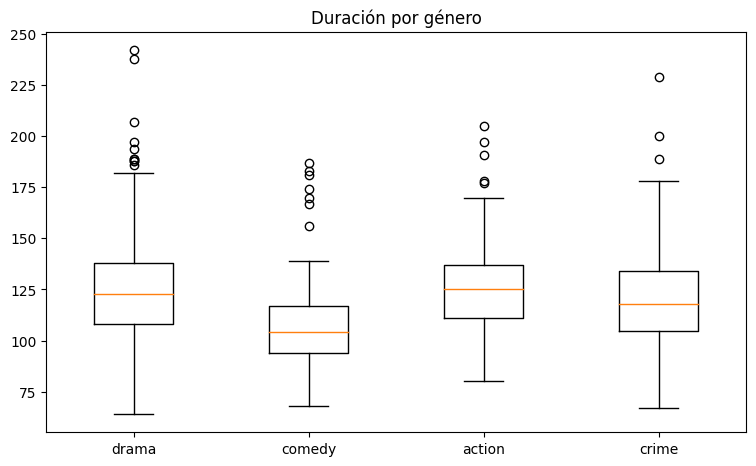

In [19]:
pelis_drama = pelis.query("genre == 'Drama'")["duration"]
pelis_comedy = pelis.query("genre == 'Comedy'")["duration"]
pelis_action = pelis.query("genre == 'Action'")["duration"]
pelis_crime = pelis.query("genre == 'Crime'")["duration"]

data = [pelis_drama, pelis_comedy, pelis_action, pelis_crime]
 
fig = plt.figure(figsize =(7, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(["drama", "comedy", "action", "crime"])

# Creating plot
bp = ax.boxplot(data)
plt.title("Duración por género")


# show plot
plt.show()

**4.** Grafique con barras la cantidad de películas, separándolas por clasificación de contenido.



content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: count, dtype: int64


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

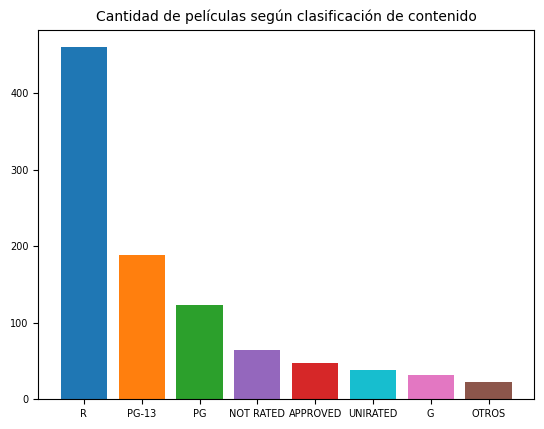

In [20]:
recuento_rating = pelis["content_rating"].value_counts()
print(recuento_rating)
ratings = ["R", "PG-13", "PG", "NOT RATED", "APPROVED", "UNIRATED", "G", "OTROS"]
recuento = []

for i in range(7):
    recuento.append(recuento_rating[i])

suma_otros = 0
for i in range(7, 12):
    suma_otros = suma_otros + recuento_rating[i]
recuento.append(suma_otros)

plt.bar(ratings, recuento, color=["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:red", "tab:cyan", "tab:pink", "tab:brown"])
plt.title("Cantidad de películas según clasificación de contenido", size=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

**5.** Encuentre la película con mayor puntaje para cada género y muestre en un `DataFrame` el resultado. Indique género, título y puntaje.

In [21]:
generos = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery', 'Western', 'Sci-Fi', 'Thriller',
       'Film-Noir', 'Family', 'History', 'Fantasy']

df_titulos = []
df_puntajes = []


for genero in generos:
       filtro=pelis['genre']==genero
       peliculas_filtradas = pelis[filtro]
       peli_mayor_puntaje = peliculas_filtradas.sort_values(by="star_rating", ascending=False).iloc[0]
       df_titulos.append(peli_mayor_puntaje.title)
       df_puntajes.append(peli_mayor_puntaje.star_rating)

resultado_dict = {
    "género": pd.Series(generos),
    "título": pd.Series(df_titulos),
    "puntaje": pd.Series(df_puntajes),
}
resultado = pd.DataFrame(resultado_dict)
resultado

,género,título,puntaje
0,Drama,12 Angry Men,8.9
1,Comedy,Life Is Beautiful,8.6
2,Action,The Dark Knight,9.0
3,Crime,The Shawshank Redemption,9.3
4,Biography,Schindler's List,8.9
5,Adventure,The Lord of the Rings: The Return of the King,8.9
6,Animation,Spirited Away,8.6
7,Horror,Psycho,8.6
8,Mystery,Rear Window,8.6
9,Western,"The Good, the Bad and the Ugly",8.9


In [30]:
pelis_ord = pelis.sort_values(by="star_rating", ascending=False)
pelis_group = pelis.groupby("genre")
pelis_group.first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
